In [203]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches

In [89]:
data = pd.read_csv('PlayerData.csv')

In [143]:
def goalDistribution():
    goalDict={}
    
    for i in range(len(data)):
        if(data['Goals'][i]):
            if(data['Position'][i] not in goalDict):
                goalDict[data['Position'][i]]=0
            goalDict[data['Position'][i]]+=1
    
    totalGoalScorers=sum(goalDict.values())
    for i in range(len(goalDict)):
        goalDict[(list(goalDict.keys())[i])]=(goalDict[(list(goalDict.keys())[i])]/totalGoalScorers)*100
    
    
    a=list(goalDict.keys())
    b=list(goalDict.values())
    
    x=pd.DataFrame(b,a)
    print(x)
    plt.pie(b, labels=a)
    plt.show()

                                  0
Centre Back                   12.50
Central Attacking Midfielder  25.00
Striker                       25.00
Left Winger                   12.50
Defensive Midfielder          12.50
Left Back                      6.25
Right Back                     6.25


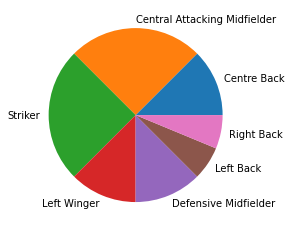

In [144]:
goalDistribution()

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [128]:
df=pd.read_csv('Manchester United Player Data.csv')

In [192]:
def BestTeam(df):
    a = 0.5
    b = 1
    c= 2
    d = 3
 
    #GoalKeeping Characterstics
    df['gk_Shot_Stopper'] = (b*df.Reactions + b*df.Composure + a*df.SprintSpeed + a*df.Strength +  b*df.GKPositioning + c*df.GKDiving + d*df.GKReflexes + b*df.GKHandling)/(2*a + 4*b + 2*c + 1*d)
    df['gk_Sweeper'] = (b*df.Reactions + b*df.Composure + b*df.SprintSpeed + a*df.ShortPassing + a*df.LongPassing + b*df.GKPositioning + b*df.GKDiving + d*df.GKReflexes + b*df.GKHandling + d*df.GKKicking + c*df.Vision)/(2*a + 4*b + 3*c + 2*d)
    
    shotStopper = df.sort_values('gk_Shot_Stopper', ascending=False)[:4]
    shotStopperX = np.array(list(shotStopper['Player Name']))
    shotStopperY = np.array(list(shotStopper['gk_Shot_Stopper']))
    
    sweeper = df.sort_values('gk_Sweeper', ascending=False)[:4]
    sweeperX = np.array(list(sweeper['Player Name']))
    sweeperY = np.array(list(sweeper['gk_Sweeper']))
    
    #Choosing Defenders
    df['df_centre_backs'] = ( d*df.Reactions + c*df.Interceptions + d*df.SlidingTackle + d*df.StandingTackle + b*df.Vision+ b*df.Composure + b*df.Crossing +a*df.ShortPassing + b*df.LongPassing + c*df.Acceleration + b*df.SprintSpeed
    + d*df.Stamina + d*df.Height//2 + d*df.HeadingAccuracy + b*df.LongShots  + c*df.Aggression)/(6*b + 3*c + 7*d)
    df['df_wb_Wing_Backs'] = (b*df.BallControl + a*df.Dribbling  + d*df.SlidingTackle + d*df.StandingTackle + a*df.Positioning + c*df.Vision + c*df.Crossing + b*df.ShortPassing + c*df.LongPassing + d*df.Acceleration +d*df.SprintSpeed + c*df.Stamina + a*df.Finishing)/(4*a + 2*b + 4*c + 4*d)

    
    cb = df[(df['Position'] == 'Centre Back')].sort_values('df_centre_backs', ascending=False)
    cbX = np.array(list(cb['Player Name']))
    cbY = np.array(list(cb['df_centre_backs']))
    
    lb = df[(df['Position'] == 'Left Back')].sort_values('df_wb_Wing_Backs', ascending=False)
    lbX = np.array(list(lb['Player Name']))
    lbY = np.array(list(lb['df_wb_Wing_Backs']))
    
    rb = df[(df['Position'] == 'Right Back')].sort_values('df_wb_Wing_Backs', ascending=False)
    rbX = np.array(list(rb['Player Name']))
    rbY = np.array(list(rb['df_wb_Wing_Backs']))
    
    
    df['mf_playmaker'] = (d*df.BallControl + d*df.Dribbling + d*df.Reactions + d*df.Vision + c*df.Positioning + c*df.Crossing + d*df.ShortPassing + c*df.LongPassing + c*df.Curve + b*df.LongShots + c*df.FKAccuracy)/(1*a + 1*b + 4*c + 4*d)
    df['mf_beast'] = (d*df.Agility + c*df.Balance + b*df.Height//2 + c*df.Strength + d*df.Stamina + a*df.SprintSpeed + c*df.Acceleration + d*df.ShortPassing + c*df.Aggression + d*df.Reactions + b*df.StandingTackle + b*df.SlidingTackle + b*df.Interceptions)/(1*a + 5*b + 4*c + 4*d)
    df['mf_controller'] = (b*df.WeakFoot + d*df.BallControl + a*df.Dribbling + a*df.Reactions + c*df.Vision + c*df.Composure + d*df.ShortPassing + d*df.LongPassing)/(2*c + 3*d + 4*a)
    
    cdm = df[(df['Position'] == 'Defensive Midfielder')].sort_values('mf_beast', ascending=False)
    cdmX = np.array(list(cdm['Player Name']))
    cdmY = np.array(list(cdm['mf_playmaker']))
    
    cam = df[(df['Position'] == 'Central Attacking Midfielder')].sort_values('mf_playmaker', ascending=False)
    camX = np.array(list(cam['Player Name']))
    camY = np.array(list(cam['mf_playmaker']))
    
    cam1 = df[(df['Position'] == 'Central Attacking Midfielder') | (df['Position'] == 'Defensive Midfielder') ].sort_values('mf_controller', ascending=False)[:5]
    cam1X = np.array(list(cam1['Player Name']))
    cam1Y = np.array(list(cam1['mf_playmaker']))
    
    df['att_left_wing'] = (c*df.WeakFoot + c*df.BallControl + c*df.Dribbling + c*df.SprintSpeed + d*df.Acceleration + b*df.Vision + c*df.Crossing + b*df.ShortPassing + b*df.LongPassing + b*df.Aggression + b*df.Agility + a*df.Curve + c*df.LongShots + b*df.FKAccuracy + d*df.Finishing)/(a + 6*b + 6*c + 2*d)
    df['att_right_wing'] = (c*df.WeakFoot + c*df.BallControl + c*df.Dribbling + c*df.SprintSpeed + d*df.Acceleration + b*df.Vision + c*df.Crossing + b*df.ShortPassing + b*df.LongPassing + b*df.Aggression + b*df.Agility + a*df.Curve + c*df.LongShots + b*df.FKAccuracy + d*df.Finishing)/(a + 6*b + 6*c + 2*d)
    df['att_striker'] = (b*df.WeakFoot + b*df.BallControl + a*df.Vision + b*df.Aggression + b*df.Agility + a*df.Curve + a*df.LongShots + d*df.Balance + d*df.Finishing + d*df.HeadingAccuracy + c*df.Height//2 + c*df.Dribbling)/(3*a + 4*b + 2*c + 3*d)
    
    lw = df[(df['Position'] == 'Left Winger')].sort_values('att_left_wing', ascending=False)
    lwX = np.array(list(lw['Player Name']))
    lwY = np.array(list(lw['att_left_wing']))
    
    rw = df[(df['Position'] == 'Right Winger')].sort_values('att_right_wing', ascending=False)
    rwX = np.array(list(rw['Player Name']))
    rwY = np.array(list(rw['att_right_wing']))
    
    st = df[(df['Position'] == 'Striker')].sort_values('att_striker', ascending=False)
    stX = np.array(list(st['Player Name']))
    stY = np.array(list(st['att_striker']))
    
    team=[]
    teamStrength=0
    team.append(shotStopperX[0])
    teamStrength+=shotStopperY[0]
    
    team.append(lbX[0])
    teamStrength+=lbY[0]
    
    for i in range(2):
        team.append(cbX[i])
        teamStrength+=cbY[i]
        
    team.append(rbX[0])
    teamStrength+=rbY[0]
    
    team.append(cdmX[0])
    teamStrength+=cdmY[i]
    
    for i in range(2):
        team.append(camX[i])
        teamStrength+=camY[i]
        
    team.append(lwX[0])
    teamStrength+=lwY[0]
    
    team.append(rwX[0])
    teamStrength+=rwY[0]
    
    team.append(stX[0])
    teamStrength+=lwY[0]
    
    return team, int(teamStrength//10)

In [193]:
BestTeam(df)

(['David De Gea',
  'Alex Telles',
  'Victor Lindelof',
  'Harry Maguire',
  'Aaron Wan-Bissaka',
  'Fred',
  'Paul Pogba',
  'Bruno Fernandes',
  'Marcus Rashford',
  'Jadon Sancho',
  'Anthony Martial'],
 89)

In [204]:
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = mpatches.Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = mpatches.Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = mpatches.Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = mpatches.ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = mpatches.Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = mpatches.Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = mpatches.Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = mpatches.Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

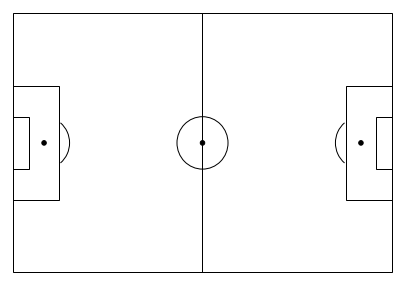

In [205]:
fig=plt.figure() #set up the figures
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
plt.show()